#### Standard imports

In [1]:
from copy import deepcopy
from ... import draw
from ...toolbox_python.attr_dict import Dict
from ..._defaults import DEFAULT_OPTIONS
from ..base.qubit import BaseQubit
from .Metal_Capacitor import Metal_Capacitor

ValueError: attempted relative import beyond top-level package

In [6]:
import qiskit_metal.renderers.renderer_mpl.toolbox_mpl
import qiskit_metal.draw.mpl

#### Define design object from design_planar

In [7]:
three_finger_cap_no_tee_v1 = metal.designs.DesignPlanar()

#### Define variables

In [75]:
# Parameters
p = three_finger_cap_no_tee_v1.parse_value(dict( # params
    cpw_width = '5um',
    cpw_gap = '3um',
    finger_length = '35um',
    pocket_buffer_width = '5um',
    position_x = '100um',
    position_y = '100um',
    orientation = '90' #90 for 90 degree turn
))

#### Define geometry for paddles and fingers

In [78]:
# Geometry of main cap structure
pad     = draw.rectangle(p.cpw_width*5, p.cpw_width)
pad_top = draw.translate(pad, 0,+(p.cpw_width*2+p.finger_length)/2) # alternative: draw.translate(pad, yoff=+(p.pad_height+p.pad_gap)/2) 
pad_bot = draw.translate(pad, 0,-(p.cpw_width*2+p.finger_length)/2)
finger  = draw.rectangle(p.cpw_width, p.finger_length)
cent_finger = draw.translate(finger, 0,+(p.cpw_width)/2)  
left_finger = draw.translate(finger, -(p.cpw_width*2),-(p.cpw_width)/2)
right_finger = draw.translate(finger, +(p.cpw_width*2),-(p.cpw_width)/2)

In [86]:
# Geometry leads
cpw_temp_1 = draw.rectangle(p.cpw_width, p.pocket_buffer_width)
cpw_top = draw.translate(cpw_temp_1, 0,+(p.cpw_width*4+p.finger_length)/2)
cpw_bot = draw.translate(cpw_temp_1, 0,-(p.cpw_width*4+p.finger_length)/2)

In [87]:
# Geometry pocket
pocket  = draw.rectangle(p.pocket_buffer_width*7, p.finger_length+5*p.pocket_buffer_width)

#### Draw geometry

In [88]:
# combine objects to draw
objects = [pad_top, pad_bot,cent_finger,left_finger,right_finger,pocket,cpw_top,cpw_bot]

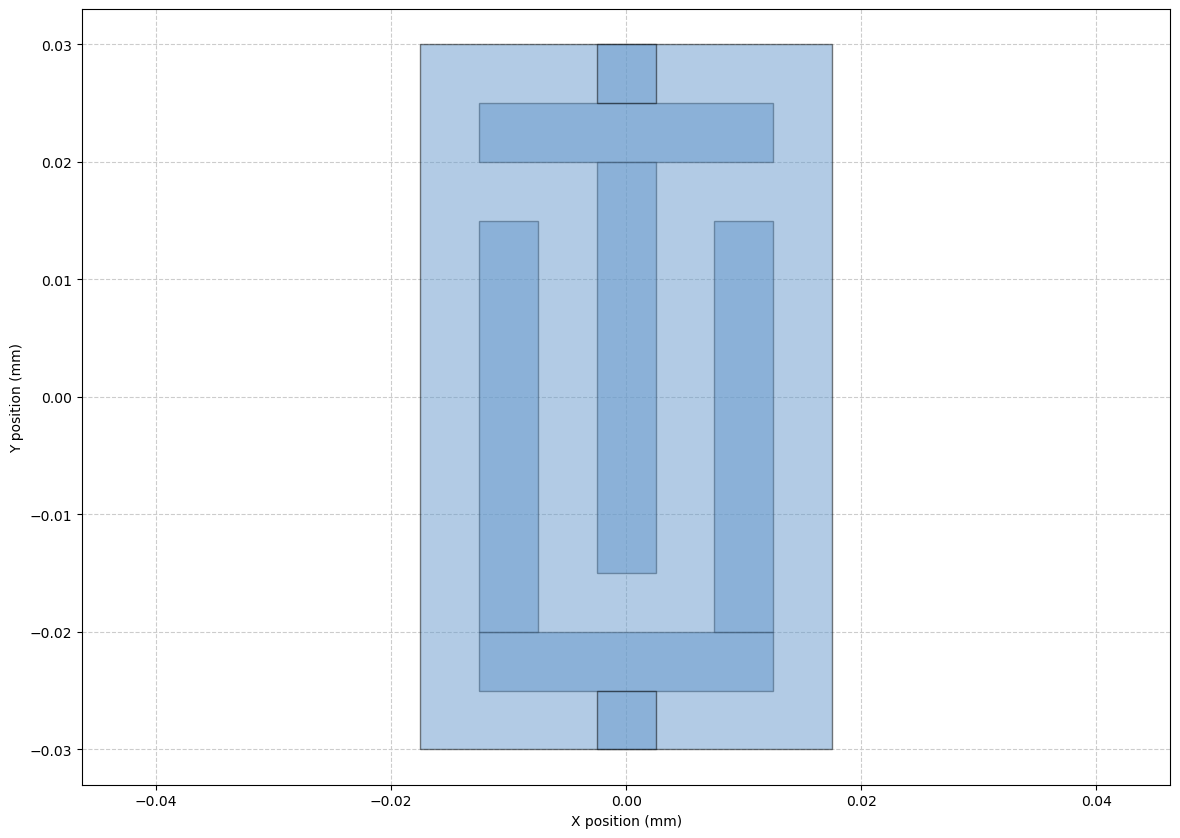

In [89]:
# Draw all
fig, ax = draw.mpl.figure_spawn()
draw.mpl.clear_axis(ax)
draw.mpl.render(objects)
ax.autoscale()
fig

In [90]:
# Translate all
objects = draw.translate(objects, xoff=p.position_x, yoff=p.position_y)
objects = draw.rotate(objects, p.orientation, origin=(p.position_x,p.position_y))

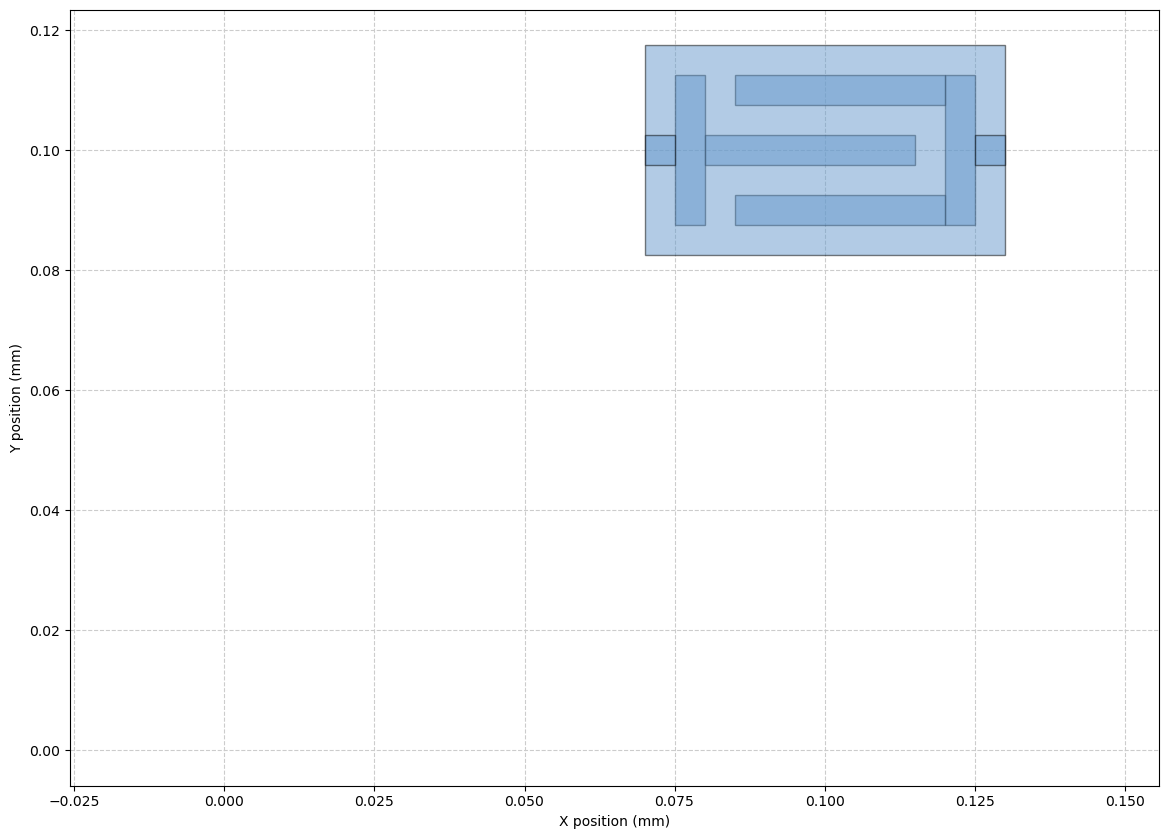

In [91]:
# Draw all
fig, ax = draw.mpl.figure_spawn()
draw.mpl.clear_axis(ax)
draw.mpl.render(objects)
ax.autoscale()
fig